In [2]:
import yfinance as yf
import pandas as pd
from datetime import datetime


ticker = 'BHARTIARTL.NS'  
df = yf.download(ticker)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-07-01,15.343904,15.997316,15.096059,15.681876,14.616556,847376
2002-07-02,15.096059,16.042379,15.096059,15.997316,14.910566,676474
2002-07-03,16.222630,16.222630,15.749470,15.839596,14.763560,574661
2002-07-04,16.109974,16.335287,15.884659,16.222630,15.120575,1148300
2002-07-05,15.794533,15.974785,15.321373,15.411499,14.364547,903273
...,...,...,...,...,...,...
2024-06-20,1405.949951,1406.949951,1376.250000,1381.150024,1381.150024,8742855
2024-06-21,1384.949951,1423.949951,1372.849976,1416.050049,1416.050049,43929578
2024-06-24,1402.000000,1423.800049,1389.349976,1419.800049,1419.800049,6195831


In [9]:
import numpy as np
data = df.filter(['Close'])

dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .95 ))

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(20, len(train_data)):
    x_train.append(train_data[i-20:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 21:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(10, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(10, return_sequences=False))
model.add(Dense(10))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=10, epochs=20)

[array([0.00436599, 0.00458351, 0.00447475, 0.00473888, 0.00417954,
       0.00411739, 0.00397755, 0.00394648, 0.00368234, 0.00352697,
       0.00343375, 0.00341821, 0.00326284, 0.0033716 , 0.0033716 ,
       0.00332499, 0.00321622, 0.003123  , 0.0032473 , 0.00302978])]
[0.0030297767280777774]

[array([0.00436599, 0.00458351, 0.00447475, 0.00473888, 0.00417954,
       0.00411739, 0.00397755, 0.00394648, 0.00368234, 0.00352697,
       0.00343375, 0.00341821, 0.00326284, 0.0033716 , 0.0033716 ,
       0.00332499, 0.00321622, 0.003123  , 0.0032473 , 0.00302978]), array([0.00458351, 0.00447475, 0.00473888, 0.00417954, 0.00411739,
       0.00397755, 0.00394648, 0.00368234, 0.00352697, 0.00343375,
       0.00341821, 0.00326284, 0.0033716 , 0.0033716 , 0.00332499,
       0.00321622, 0.003123  , 0.0032473 , 0.00302978, 0.00302978])]
[0.0030297767280777774, 0.0030142386999248002]

Epoch 1/20
517/517 [==============================] - 18s 21ms/step - loss: 0.0029
Epoch 2/20
517/517 [============

In [10]:
predictions = model.predict(x_train)
# predictions = scaler.inverse_transform(predictions)
r2 = r2_score(y_train,predictions)
r2

162/162 [==============================] - 3s 9ms/step


0.9976365498122827

In [11]:
from  sklearn.metrics import r2_score
test_data = scaled_data[training_data_len - 20: , :]

x_test = []
y_test = scaled_data[training_data_len:, :]
for i in range(20, len(test_data)):
    x_test.append(test_data[i-20:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
# predictions = scaler.inverse_transform(predictions)
r2 = r2_score(y_test,predictions)
r2

9/9 [==============================] - 0s 7ms/step


0.9923234733303845

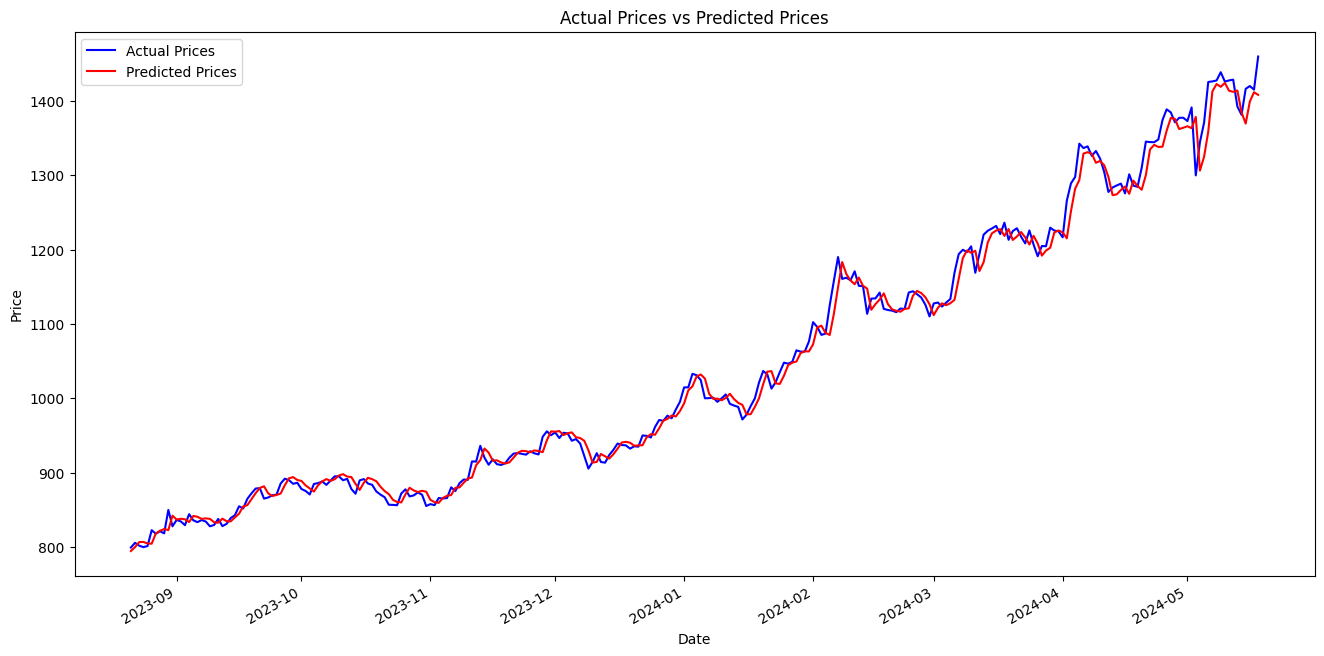

In [12]:
import matplotlib.pyplot as plt
y_test = scaler.inverse_transform(y_test)
predictions = scaler.inverse_transform(predictions)
test_dates = pd.date_range(start='2023-08-21', periods=len(y_test), freq='D')

# Plot the data
plt.figure(figsize=(16, 8))
plt.plot(test_dates, y_test, color='blue', label='Actual Prices')
plt.plot(test_dates, predictions, color='red', label='Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.gcf().autofmt_xdate()  # Rotate date labels for better readability
plt.show()

In [13]:
import joblib


model_file_path = '10.joblib'
scaler_file_path = 'scaler10.joblib'

joblib.dump(model, model_file_path)
joblib.dump(scaler, scaler_file_path)

print(f"Model saved to {model_file_path}")
print(f"Scaler saved to {scaler_file_path}")

Model saved to 10.joblib
Scaler saved to scaler10.joblib
